<a href="https://colab.research.google.com/github/novay/python/blob/main/classification/adaboosts_classifier_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Ada Boost (Example)**<br/>

Di notebook ini saya akan coba membuat poin-poin penting dalam melakukan proses klasifikasi menggunakan **Algoritma Ada Boost**. 

#### **1. Initial Set-Up**<br/>
Pada tahap ini saya mengumpulkan semua library yang akan digunakan dalam 1 cell berikut ini:

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

#### **2. Data Preparation**<br/>
Sebelum mulai, pastikan sudah menyiapkan data yang ingin diolah.

##### **2.1 Read Dataset**<br/>


In [3]:
df = pd.read_csv("/content/nama-gender-titik.csv", encoding='utf-8', sep=";")

df.isnull().values.any() # mengecek apakah ada data yang berisi null
len(df[pd.isnull(df).any(axis=1)]) # mengecek jumlah baris data yang berisi null
df = df.dropna(how='all') # menghapus baris null dan recheck kembali
len(df[pd.isnull(df).any(axis=1)])

map = {"m" : 1, "f" : 0} # Mapping gender
df["gender"] = df["gender"].map(map)

df.sample(5)

,nama,gender
79416,anindya salsabila agustya putri,0
567113,syifa azzahra hafidz,0
291582,kustiyah,0
171633,eka rifadiansyah,1
783,alfrida palimbunga',0


In [4]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624235 entries, 0 to 624234
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   nama    624235 non-null  object
 1   gender  624235 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ MB


- Seperti yang dilihat ada 2 kolom dalam database diatas dan tidak ada yang bernilai kosong, null atau NaN.

##### **2.2 Distribusi Variabel Target**<br/>
Dimana, variable targetnya adalah `gender`

In [5]:
df['gender'].value_counts()

1    322536
0    301699
Name: gender, dtype: int64

- Variabel target adalah `gender`. Berisi 2 nilai - 0 dan 1.
- 0 untuk **Perempuan** dan 1 untuk **Laki-Laki**.
- Dari sini kita akan memperlakukannya sebagai klasifikasi biner.

##### **2.3 Penentuan Variabel**

In [7]:
feature_col_names = ["nama"]
predicted_class_names = ["gender"]

X = df[feature_col_names].values     
y = df[predicted_class_names].values

##### **2.4 Split Dataset**<br/>
Split dataset into training and test set

In [8]:
split_test_size = 0.30

text_train, text_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, stratify=y, random_state=42) 

print("Dataset Asli Pria       : {0} ({1:0.2f}%)".format(len(df.loc[df['gender'] == 1]), (len(df.loc[df['gender'] == 1])/len(df.index)) * 100.0))
print("Dataset Asli Wanita     : {0} ({1:0.2f}%)".format(len(df.loc[df['gender'] == 0]), (len(df.loc[df['gender'] == 0])/len(df.index)) * 100.0))
print("")
print("Dataset Training Pria   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Dataset Training Wanita : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Dataset Test Pria       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Dataset Test Wanita     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Dataset Asli Pria       : 322536 (51.67%)
Dataset Asli Wanita     : 301699 (48.33%)

Dataset Training Pria   : 225775 (51.67%)
Dataset Training Wanita : 211189 (48.33%)

Dataset Test Pria       : 96761 (51.67%)
Dataset Test Wanita     : 90510 (48.33%)


#### **3. Feature Extraction**

##### **3.1 Count Vectorizer**

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_cv = CountVectorizer(analyzer='char_wb', ngram_range=(2,6))
vectorizer_cv.fit(text_train.ravel())

X_train_cv = vectorizer_cv.transform(text_train.ravel())
X_test_cv = vectorizer_cv.transform(text_test.ravel())

##### **3.2 TF-IDF**

In [9]:
vectorizer_tfidf = TfidfVectorizer(analyzer='char_wb', ngram_range=(2,6))
vectorizer_tfidf.fit(text_train.ravel())

X_train_tfidf = vectorizer_tfidf.transform(text_train.ravel())
X_test_tfidf = vectorizer_tfidf.transform(text_test.ravel())

#### **4. Buat Model**

##### **4.1 AdaBoost Classifier**

In [22]:
# Count Vectorizer
from sklearn.ensemble import AdaBoostClassifier

clf_cv = AdaBoostClassifier()
clf_cv.fit(X_train_cv, y_train)

AdaBoostClassifier()

In [23]:
import pickle

with open('/content/ada-cv-models.pkl', 'wb') as f:
    pickle.dump(clf_cv, f)

In [11]:
# TF-IDF
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
clf.fit(X_train_tfidf, y_train)

AdaBoostClassifier()

In [12]:
import pickle

with open('/content/ada-tfidf-models.pkl', 'wb') as f:
    pickle.dump(clf, f)

##### **4.2 Data Tesing**

In [26]:
# Count Vectorizer
dt_pred_cv = clf_cv.predict(X_test_cv)
accuracy = metrics.accuracy_score(dt_pred_cv, y_test)

print('AdaBoost Model (CV) accuracy score: {0:0.4f}'.format(metrics.accuracy_score(y_test, dt_pred_cv)))

AdaBoost Model (CV) accuracy score: 0.8937


In [13]:
# TF-IDF
dt_pred_tfidf = clf.predict(X_test_tfidf)
accuracy = metrics.accuracy_score(dt_pred_tfidf, y_test)

print('AdaBoost Model accuracy score: {0:0.4f}'.format(metrics.accuracy_score(y_test, dt_pred_tfidf)))

AdaBoost Model accuracy score: 0.8911


##### **4.3 Data Train**<br/>
Sekarang, aku akan membandingkan akurasi dari train-set dan test-set untuk pemeriksaan overfitting.

In [27]:
# Count Vectorizer
y_pred_train_cv = clf_cv.predict(X_train_cv)
print('Training-set accuracy score: {0:0.4f}'. format(metrics.accuracy_score(y_train, y_pred_train_cv)))

Training-set accuracy score: 0.8926


In [14]:
# TF-IDF
y_pred_train = clf.predict(X_train_tfidf)
print('Training-set accuracy score: {0:0.4f}'. format(metrics.accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8910


##### **4.4 Overfitting Check**

In [28]:
# Count Vectorizer
print('Training set score: {:.4f}'.format(clf_cv.score(X_train_cv, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test_tfidf, y_test)))

Training set score: 0.8926
Test set score: 0.8911


In [15]:
# TF-IDF
print('Training set score: {:.4f}'.format(clf.score(X_train_tfidf, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test_tfidf, y_test)))

Training set score: 0.8910
Test set score: 0.8911


Akurasi train-set dan test-set cukup sebanding. Jadi, kita tidak bisa mengatakan ada overfitting.

#### **5. Evaluasi Model**

##### **5.1 Confusion Matrix**

In [29]:
# Count Vectorizer
cm_cv = confusion_matrix(y_test, dt_pred_cv)

print('Confusion matrix\n\n', cm_cv)
print('\nTrue Positives(TP) = ', cm_cv[0,0])
print('True Negatives(TN) = ', cm_cv[1,1])
print('False Positives(FP) = ', cm_cv[0,1])
print('False Negatives(FN) = ', cm_cv[1,0])

Confusion matrix

 [[80578  9932]
 [ 9977 86784]]

True Positives(TP) =  80578
True Negatives(TN) =  86784
False Positives(FP) =  9932
False Negatives(FN) =  9977


<Axes: >

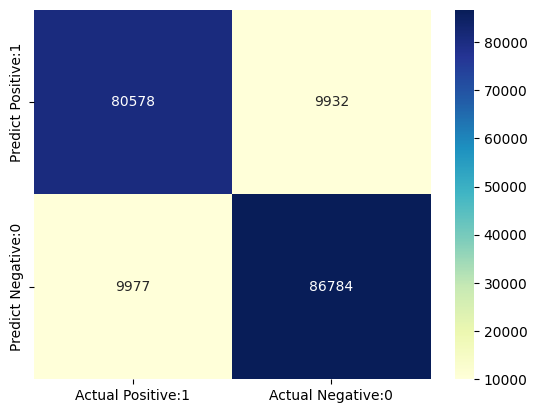

In [30]:
cm_matrix_cv = pd.DataFrame(data=cm_cv, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_cv, annot=True, fmt='d', cmap='YlGnBu')

In [16]:
# TF-IDF
cm = confusion_matrix(y_test, dt_pred_tfidf)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[80977  9533]
 [10865 85896]]

True Positives(TP) =  80977
True Negatives(TN) =  85896
False Positives(FP) =  9533
False Negatives(FN) =  10865


<Axes: >

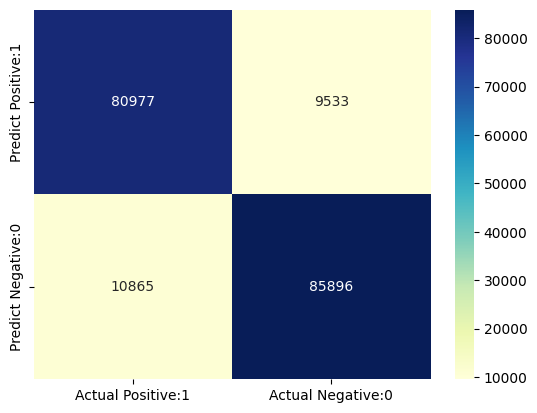

In [17]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

##### **5.2 Classification Metrices**

In [32]:
# Count Vectorizer
print(metrics.classification_report(y_test, dt_pred_cv, digits=5, labels=[1,0]))

              precision    recall  f1-score   support

           1    0.89731   0.89689   0.89710     96761
           0    0.88982   0.89027   0.89005     90510

    accuracy                        0.89369    187271
   macro avg    0.89357   0.89358   0.89357    187271
weighted avg    0.89369   0.89369   0.89369    187271



In [18]:
# TF-IDF
print(metrics.classification_report(y_test, dt_pred_tfidf, digits=5, labels=[1,0]))

              precision    recall  f1-score   support

           1    0.90010   0.88771   0.89387     96761
           0    0.88170   0.89467   0.88814     90510

    accuracy                        0.89108    187271
   macro avg    0.89090   0.89119   0.89100    187271
weighted avg    0.89121   0.89108   0.89110    187271



#### **6. Prediksi Manual**

In [33]:
def prediksi(prediction):
    return 'Laki-Laki' if prediction == 1 else 'Perempuan'

nama = [
  'Novi Gustiana', 
  'Novia Kumala Sari', 
  'Novianto Rahmadi', 
  'Padli Nofrizal', 
  'Putri Wahyuni', 
  'Rahmat Hidayat', 
  'Rahmi Andreni', 
  'Rian Aries Fani', 
  'Riandi Selvi', 
  'Rianto', 
  'Ridha Ulva', 
  'Rizqi Wahyuningsih', 
  'Ruwadi Saputra', 
  'Sugeng Hermawan', 
  'Suliatun', 
  'Tomi Ismeidianto', 
  'Usthalay Putra', 
  'Winggo Aga Septian', 
  'Yunaldi Rizki Putra', 
  'Arif fasetyo', 
  'Arie Rahman Satria', 
  'Arinda Oktaviana', 
  'Melani', 
  'Malik', 
  'Melani Malik'
]
inputan = vectorizer_cv.transform(nama)

for i in range(len(nama)):
    prediction = clf_cv.predict(inputan[i])[0]
    print(f"Nama: {nama[i]}, Prediksi: {prediksi(prediction)}")

Nama: Novi Gustiana, Prediksi: Perempuan
Nama: Novia Kumala Sari, Prediksi: Perempuan
Nama: Novianto Rahmadi, Prediksi: Laki-Laki
Nama: Padli Nofrizal, Prediksi: Laki-Laki
Nama: Putri Wahyuni, Prediksi: Perempuan
Nama: Rahmat Hidayat, Prediksi: Laki-Laki
Nama: Rahmi Andreni, Prediksi: Laki-Laki
Nama: Rian Aries Fani, Prediksi: Laki-Laki
Nama: Riandi Selvi, Prediksi: Laki-Laki
Nama: Rianto, Prediksi: Laki-Laki
Nama: Ridha Ulva, Prediksi: Perempuan
Nama: Rizqi Wahyuningsih, Prediksi: Perempuan
Nama: Ruwadi Saputra, Prediksi: Laki-Laki
Nama: Sugeng Hermawan, Prediksi: Laki-Laki
Nama: Suliatun, Prediksi: Perempuan
Nama: Tomi Ismeidianto, Prediksi: Laki-Laki
Nama: Usthalay Putra, Prediksi: Laki-Laki
Nama: Winggo Aga Septian, Prediksi: Laki-Laki
Nama: Yunaldi Rizki Putra, Prediksi: Laki-Laki
Nama: Arif fasetyo, Prediksi: Laki-Laki
Nama: Arie Rahman Satria, Prediksi: Laki-Laki
Nama: Arinda Oktaviana, Prediksi: Perempuan
Nama: Melani, Prediksi: Perempuan
Nama: Malik, Prediksi: Laki-Laki
Nama: 

In [19]:
# TF-IDF
def prediksi(prediction):
    return 'Laki-Laki' if prediction == 1 else 'Perempuan'

nama = [
  'Novi Gustiana', 
  'Novia Kumala Sari', 
  'Novianto Rahmadi', 
  'Padli Nofrizal', 
  'Putri Wahyuni', 
  'Rahmat Hidayat', 
  'Rahmi Andreni', 
  'Rian Aries Fani', 
  'Riandi Selvi', 
  'Rianto', 
  'Ridha Ulva', 
  'Rizqi Wahyuningsih', 
  'Ruwadi Saputra', 
  'Sugeng Hermawan', 
  'Suliatun', 
  'Tomi Ismeidianto', 
  'Usthalay Putra', 
  'Winggo Aga Septian', 
  'Yunaldi Rizki Putra', 
  'Arif fasetyo', 
  'Arie Rahman Satria', 
  'Arinda Oktaviana', 
  'Melani', 
  'Malik', 
  'Melani Malik'
]
inputan = vectorizer_tfidf.transform(nama)

for i in range(len(nama)):
    prediction = clf.predict(inputan[i])[0]
    print(f"Nama: {nama[i]}, Prediksi: {prediksi(prediction)}")

Nama: Novi Gustiana, Prediksi: Perempuan
Nama: Novia Kumala Sari, Prediksi: Perempuan
Nama: Novianto Rahmadi, Prediksi: Laki-Laki
Nama: Padli Nofrizal, Prediksi: Laki-Laki
Nama: Putri Wahyuni, Prediksi: Perempuan
Nama: Rahmat Hidayat, Prediksi: Laki-Laki
Nama: Rahmi Andreni, Prediksi: Laki-Laki
Nama: Rian Aries Fani, Prediksi: Laki-Laki
Nama: Riandi Selvi, Prediksi: Laki-Laki
Nama: Rianto, Prediksi: Laki-Laki
Nama: Ridha Ulva, Prediksi: Perempuan
Nama: Rizqi Wahyuningsih, Prediksi: Perempuan
Nama: Ruwadi Saputra, Prediksi: Laki-Laki
Nama: Sugeng Hermawan, Prediksi: Laki-Laki
Nama: Suliatun, Prediksi: Perempuan
Nama: Tomi Ismeidianto, Prediksi: Laki-Laki
Nama: Usthalay Putra, Prediksi: Laki-Laki
Nama: Winggo Aga Septian, Prediksi: Laki-Laki
Nama: Yunaldi Rizki Putra, Prediksi: Laki-Laki
Nama: Arif fasetyo, Prediksi: Laki-Laki
Nama: Arie Rahman Satria, Prediksi: Laki-Laki
Nama: Arinda Oktaviana, Prediksi: Perempuan
Nama: Melani, Prediksi: Perempuan
Nama: Malik, Prediksi: Laki-Laki
Nama: 